In [2]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split

In [3]:
#Define the cost function
def cost_function(X, Y, W):
    """
    Parameters:
    This function finds the Mean Square Error.
    Input parameters:
    X: Feature Matrix
    Y: Target Matrix
    W: Weight Matrix
    Output Parameters:
    cost: accumulated mean square error.
    """
    m = len(Y)
    
    cost = 0
    cost += (1/ (2 * m)) * np.sum((Y - np.dot(X, W)) ** 2)
    return cost


In [4]:
#Test case 
X_test = np.array([[1,2], [3,4], [5,6]])
Y_test = np.array([3, 7, 11])
W_test = np.array([1, 1])
cost =  cost_function(X_test, Y_test, W_test)
# if cost == 0:
#     print("Test Passed")
# else:
#     print("Something went wrong: Reimplement the cost function")
print("Cost function output: ", cost)

Cost function output:  0.0


In [5]:
def gradient_descent(X, Y, W, alpha, iterations):
    """
    Perform gradient descent to optimize the parameters of a linear regression model.
    Parameters:
        X (numpy.ndarray): Feature matrix (m x n).
        Y (numpy.ndarray): Target vector (m x 1).
        W (numpy.ndarray): Initial guess for parameters (n x 1).
        alpha (float): Learning rate.
        iterations (int): Number of iterations for gradient descent.
    Returns:
        tuple: A tuple containing the final optimized parameters (W_update) and the history of cost values.
        W_update (numpy.ndarray): Updated parameters (n x 1).
        cost_history (list): History of cost values over iterations.    
    """
    # Initialize cost history
    cost_history = []
    m = len(Y)  # Number of samples
    
    for iteration in range(iterations):
        # Predictions
        Y_pred = np.dot(X, W)
        
        # Loss
        loss = Y_pred - Y
        
        # Gradient calculation
        dw = (1 / m) * np.dot(X.T, loss)
        
        # Update weights
        W = W - alpha * dw
        
        # Compute and save cost
        cost = cost_function(X, Y, W)  # Ensure this function is defined
        cost_history.append(cost)
    
    return W, cost_history


In [6]:
# Generate random test data 
np.random.seed(0)
X =  np.random.rand(100, 3)
Y = np.random.rand(100)
W = np.random.rand(3)
alpha = 0.01
iterations = 1000
#Test the gradient descent function
final_params, cost_history = gradient_descent(X, Y, W, alpha, iterations)
print("Final Parameters:", final_params)
print("Cost History:", cost_history)


Final Parameters: [0.20551667 0.54295081 0.10388027]
Cost History: [np.float64(0.10711197094660153), np.float64(0.10634880599939901), np.float64(0.10559826315680618), np.float64(0.10486012948320558), np.float64(0.1041341956428534), np.float64(0.10342025583900626), np.float64(0.1027181077540776), np.float64(0.1020275524908062), np.float64(0.10134839451441931), np.float64(0.1006804415957737), np.float64(0.1000235047554587), np.float64(0.09937739820884377), np.float64(0.09874193931205609), np.float64(0.09811694850887098), np.float64(0.09750224927850094), np.float64(0.0968976680842672), np.float64(0.09630303432313951), np.float64(0.09571818027612913), np.float64(0.09514294105952065), np.float64(0.09457715457692842), np.float64(0.09402066147216397), np.float64(0.09347330508290017), np.float64(0.09293493139511913), np.float64(0.09240538899833017), np.float64(0.09188452904154543), np.float64(0.0913722051899995), np.float64(0.09086827358260123), np.float64(0.09037259279010502), np.float64(0.08

In [7]:
#Model Evaluation - RMSE
def rmse(Y, Y_pred):
    """
    Calculate the Root Mean Square Error.
    Parameters:
    Y (numpy.ndarray): Target vector (m x 1).
    Y_pred (numpy.ndarray): Prediction vector (m x 1).
    Returns:
    float: Root Mean Square Error.
    """
    m = len(Y)
    rmse = np.sqrt(np.sum((Y - Y_pred) ** 2) / m)
    return rmse

In [8]:
#Model Evaluation - R2 Score
def r2_score(Y, Y_pred):
    """
    Calculate the R2 score.
    Parameters:
    Y (numpy.ndarray): Target vector (m x 1).
    Y_pred (numpy.ndarray): Prediction vector (m x 1).
    Returns:
    float: R2 score.
    """
    
    mean_y = np.mean(Y)
    ss_tot = np.sum((Y - mean_y) ** 2)
    ss_res = np.sum((Y - Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

In [9]:
#plotting the cost history 
import matplotlib.pyplot as plt 
def plot_cost_history(iterations, cost_history):
    plt.plot(range(iterations), cost_history)
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.title("Cost History")
    return plt.show()

def plot_acutal_vs_predicted(Y, Y_pred):
    
    plt.scatter(Y, Y_pred)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title("Actual vs Predicted")
    return plt.show()
    



Final Weights: [0.34873377 0.65071188]
Cost History (First 10 iterations): [np.float64(2008.442297238113), np.float64(1642.4904724460584), np.float64(1343.7789752911124), np.float64(1099.9528096439215), np.float64(900.9271339905061), np.float64(738.4701344720132), np.float64(605.8625424401251), np.float64(497.61971356936573), np.float64(409.2647732246676), np.float64(337.14344497360514)]
RMSE on Test Set: 5.524176336610737
R-Squared on Test Set: 0.8733843365266284


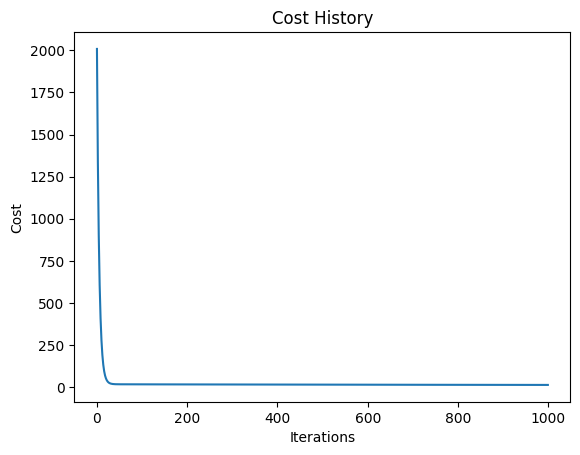

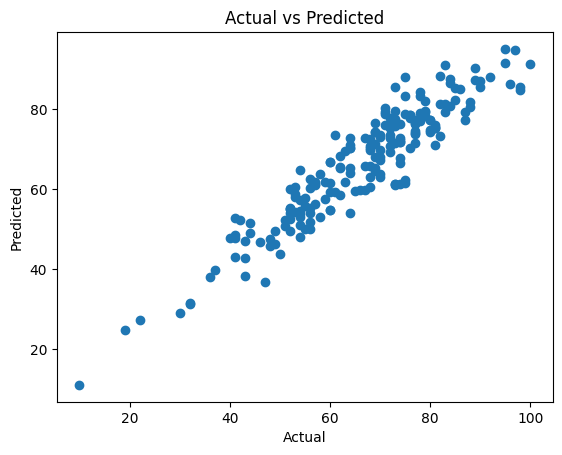

In [10]:
#Main function
def main():
    #Step 1: load the dataset 
    data = pd.read_csv(r"C:\Users\Asus\Desktop\ML_Herald\Repository\5CS037-2024-Rohit\Worksheets\Datasets\StudentsPerformance.csv")

    X = data[['math score', 'reading score']].values
    Y = data['writing score'].values

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    W = np.zeros(X_train.shape[1])
    alpha = 0.00001
    iterations = 1000
    W_optimal, cost_history = gradient_descent(X_train, Y_train, W, alpha, iterations)
    Y_pred = np.dot(X_test, W_optimal)
    rmse_score = rmse(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)   
    print("Final Weights:", W_optimal)
    print("Cost History (First 10 iterations):", cost_history[:10])
    print("RMSE on Test Set:", rmse_score)
    print("R-Squared on Test Set:", r2)
    plot_cost_history(iterations, cost_history)
    plot_acutal_vs_predicted(Y_test, Y_pred)

if __name__ == "__main__":
    main()
